
# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this report we work on a data set from TMDb. The data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings, genres, movie budget and movie revenue. In particular we want to understand:
1. Which genres were most popular between 1996 and 2015?
2. What kind of properties are associated with movies that have high revenues?



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


### Reading Data

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Unuseful Feilds
1. There are some fields which are not relevnat in our analysis like "imdb_id", "original_title", "homepage", "tagline", "keywords" and "overview". We'll drop them in the data cleaning step.

2. The last two fields of "budget_adj" and "revenue_adj" will be used instead of "budget" and "revenue" because they take into account the inflation over the years.

3. 'cast', 'director' and 'production_companies' are not going to be used in our analysis, because there are so many differnt values in them, making it hard to categorize and associate them with other fields.

4. There are two fiels for realease date: "release_date" and " release_year". "release_date" has more detail information which we dont need for our analysis, so we keep" release_year" and drop " release_date".

### Missing Values
There are some missing values in 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'genres' and 'production_companies'. In the previous sectoin, We decided to drop all these fields except "genres". So we just need to take action on "genres" missing values. 

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Zero Values
The 25% and 50% values in "budget_adj" and "revenue_adj" columns are zero. So we treat these zero values as missing values and will drop their rows. 

In [5]:
df.query('revenue_adj == 0').id.count()

6016

In [6]:
df.query('budget_adj == 0').id.count()

5696

 We treat these zero values as missing values, and drop their rows.

## Data Cleaning 

### Droping Columns
First we drop the columns we discussed earlier.

In [7]:
df.drop(['imdb_id', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline',
         'keywords', 'overview', 'production_companies', 'release_date'], axis=1, inplace= True)

### Check for Duplicates

In [8]:
sum(df.duplicated())


1

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
sum(df.duplicated())

0

### Droping Missing Values

In [11]:
df.isnull().sum()

id               0
popularity       0
runtime          0
genres          23
vote_count       0
vote_average     0
release_year     0
budget_adj       0
revenue_adj      0
dtype: int64

In [12]:
df.dropna(how='any', inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 9 columns):
id              10842 non-null int64
popularity      10842 non-null float64
runtime         10842 non-null int64
genres          10842 non-null object
vote_count      10842 non-null int64
vote_average    10842 non-null float64
release_year    10842 non-null int64
budget_adj      10842 non-null float64
revenue_adj     10842 non-null float64
dtypes: float64(4), int64(4), object(1)
memory usage: 847.0+ KB


As explained earlier, We drop the rows with zero value for "revenue_adj" or "budget_adj".

In [14]:
df = df[df.revenue_adj != 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4849 entries, 0 to 10848
Data columns (total 9 columns):
id              4849 non-null int64
popularity      4849 non-null float64
runtime         4849 non-null int64
genres          4849 non-null object
vote_count      4849 non-null int64
vote_average    4849 non-null float64
release_year    4849 non-null int64
budget_adj      4849 non-null float64
revenue_adj     4849 non-null float64
dtypes: float64(4), int64(4), object(1)
memory usage: 378.8+ KB


In [15]:
df = df[df.budget_adj != 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 9 columns):
id              3854 non-null int64
popularity      3854 non-null float64
runtime         3854 non-null int64
genres          3854 non-null object
vote_count      3854 non-null int64
vote_average    3854 non-null float64
release_year    3854 non-null int64
budget_adj      3854 non-null float64
revenue_adj     3854 non-null float64
dtypes: float64(4), int64(4), object(1)
memory usage: 301.1+ KB


<a id='eda'></a>
## Exploratory Data Analysis


### Q1-  Which genres were most popular between 1996 and 2015?

Since this question asks about the movies that were released between 1996 and 2015, we filter our data based on "released_year" field. 

In [16]:
df_20years = df[df.release_year > 1995]

In [17]:
df_20years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2884 entries, 0 to 9153
Data columns (total 9 columns):
id              2884 non-null int64
popularity      2884 non-null float64
runtime         2884 non-null int64
genres          2884 non-null object
vote_count      2884 non-null int64
vote_average    2884 non-null float64
release_year    2884 non-null int64
budget_adj      2884 non-null float64
revenue_adj     2884 non-null float64
dtypes: float64(4), int64(4), object(1)
memory usage: 225.3+ KB


In our data set, "genres" column contains multiple values separated by pipe (|) character. 
<br>In order to find all genres that exist in our data set, we'll run the following code:

In [18]:
all_genres = list(set(df_20years.genres.str.cat(sep ="|").split("|")))
all_genres , len( all_genres)

(['Music',
  'Comedy',
  'Drama',
  'Fantasy',
  'TV Movie',
  'Horror',
  'War',
  'Mystery',
  'Romance',
  'Animation',
  'Crime',
  'Science Fiction',
  'History',
  'Documentary',
  'Western',
  'Thriller',
  'Foreign',
  'Adventure',
  'Action',
  'Family'],
 20)

There are 20 differnt genres in our data set.



### Number of movies released from 1996 to 2015

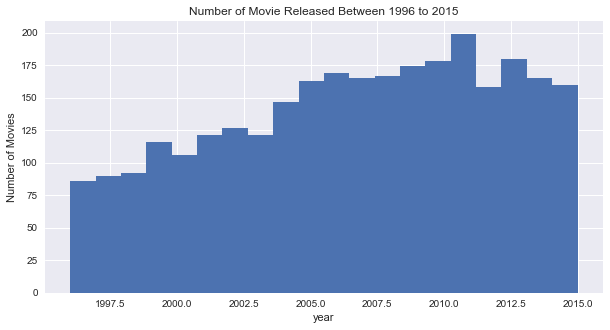

In [19]:
plt.figure(figsize=(10, 5))
sns.set()
plt.hist(df_20years['release_year'], bins=20)
plt.xlabel('year')
plt.ylabel('Number of Movies')
plt.title('Number of Movie Released Between 1996 to 2015');


As we can see, the number of movies in 2015, is almost twice the number of movies in 1996. 

### Distribution of popularity between 1996 and 2015:

In [20]:
df_20years.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,2884.000000,2884.000000,2884.000000,2884.000000,2884.000000,2884.000000,2.884000e+03,2.884000e+03
mean,49999.492025,1.283314,108.489598,601.418169,6.112067,2006.661928,4.761033e+07,1.277516e+08
std,74838.071719,1.601480,18.801966,945.451907,0.779351,5.434993,4.827910e+07,2.010761e+08
min,12.000000,0.001117,15.000000,10.000000,2.200000,1996.000000,9.693980e-01,2.370705e+00
25%,8487.750000,0.497205,95.000000,85.750000,5.600000,2002.000000,1.339331e+07,1.614076e+07
50%,13412.000000,0.876550,105.000000,253.000000,6.100000,2007.000000,3.137941e+07,5.783592e+07
75%,58169.250000,1.473959,118.000000,688.250000,6.600000,2011.000000,6.691203e+07,1.528228e+08
max,417859.000000,32.985763,338.000000,9767.000000,8.200000,2015.000000,4.250000e+08,2.827124e+09


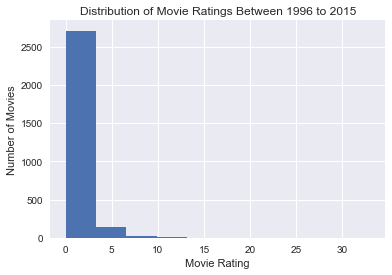

In [21]:
plt.hist(df_20years['popularity'])
plt.xlabel('Movie Rating')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Ratings Between 1996 to 2015');


As we can see the popularity value for most of the movies is less than 3, and the average value for popularity is 1.28.

### Number of movies released for differnt genres from 1996 to 2015

We know some movies have multiple genres. In order to do any study per genre, we need to split the rows with multiple genres to several rows; one row per each genre. The result is saved in df_genres data frame.

In [22]:
df_genres = (df_20years.drop('genres', axis=1)
             .join
             (
             df_20years.genres
             .str
             .split('|', expand=True)
             .stack()
             .reset_index(drop=True, level=1)
             .rename('genres')           
             ))
df_genres.head()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,135397,32.985763,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
0,135397,32.985763,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
0,135397,32.985763,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
0,135397,32.985763,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
1,76341,28.419936,120,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


To find the number of movies were produced in each gener, we'll use the following command:

In [23]:
movies_in_genres = (df_genres.groupby('genres', as_index=False).id.count()
                             .sort_values(by='id', ascending=False))

movies_in_genres

,genres,id
6,Drama,1334
3,Comedy,1038
17,Thriller,900
0,Action,782
1,Adventure,534
14,Romance,505
4,Crime,472
15,Science Fiction,359
7,Family,320
11,Horror,309


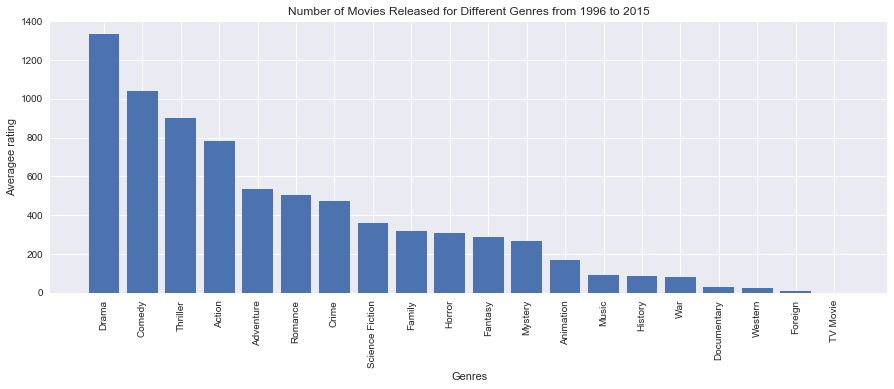

In [24]:
locations = list(range(1,21))
heights = movies_in_genres.iloc[:, 1]
lables = movies_in_genres.iloc[:, 0]
plt.subplots(figsize=(15, 5))
plt.bar(locations, heights, tick_label=lables)
plt.title('Number of Movies Released for Different Genres from 1996 to 2015')
plt.xlabel('Genres')
plt.ylabel('Averagee rating');
plt.xticks(rotation=90);

As we can see some genres like 'Tv Movie' and 'Foreign' include a very small number of movies in our data set.
The genres with the highest number of production are 'Drama', 'Comedy', 'Thriller', 'Action' and 'Adventure'.

### Popularity for different genres from 1996 to 2015

In [25]:
genre_popularity= (df_genres.groupby('genres', as_index=False)['popularity'].mean()
                            .sort_values(by='popularity', ascending=False ))

genre_popularity

,genres,popularity
15,Science Fiction,2.182806
1,Adventure,2.123756
8,Fantasy,2.025157
0,Action,1.760900
2,Animation,1.744508
19,Western,1.575194
7,Family,1.552059
18,War,1.391474
17,Thriller,1.363990
13,Mystery,1.245874


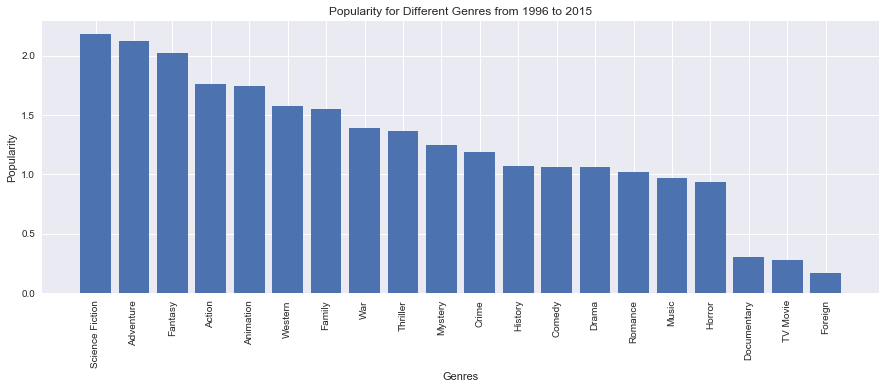

In [26]:
locations = list(range(1,21))
heights = genre_popularity.iloc[:, 1]
lables = genre_popularity.iloc[:, 0]
plt.subplots(figsize=(15, 5))
plt.bar(locations, heights, tick_label=lables)
plt.title('Popularity for Different Genres from 1996 to 2015')
plt.xlabel('Genres')
plt.ylabel('Popularity');
plt.xticks(rotation=90);


As we can see 'Science Fiction', 'Adventure', 'Fantasy', 'Action' and 'Animation' had the highest popularity from 1996 to 2015.
<br>'TV Movie' and 'Foreign' genres are the least popular genres and they have the least number of production( we found out in the privious section) in the 20 years of our study.

Now that we've figured out the most popular genres, lets find out the average rating and the trend of popularity for them over these years. 

### Average rating for the most popular genres

In [27]:
popular_genres = list(genre_popularity['genres'][:5])
popular_genres

['Science Fiction', 'Adventure', 'Fantasy', 'Action', 'Animation']

In [28]:
df_20years.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,2884.000000,2884.000000,2884.000000,2884.000000,2884.000000,2884.000000,2.884000e+03,2.884000e+03
mean,49999.492025,1.283314,108.489598,601.418169,6.112067,2006.661928,4.761033e+07,1.277516e+08
std,74838.071719,1.601480,18.801966,945.451907,0.779351,5.434993,4.827910e+07,2.010761e+08
min,12.000000,0.001117,15.000000,10.000000,2.200000,1996.000000,9.693980e-01,2.370705e+00
25%,8487.750000,0.497205,95.000000,85.750000,5.600000,2002.000000,1.339331e+07,1.614076e+07
50%,13412.000000,0.876550,105.000000,253.000000,6.100000,2007.000000,3.137941e+07,5.783592e+07
75%,58169.250000,1.473959,118.000000,688.250000,6.600000,2011.000000,6.691203e+07,1.528228e+08
max,417859.000000,32.985763,338.000000,9767.000000,8.200000,2015.000000,4.250000e+08,2.827124e+09


In [29]:
popular_genres_rating = (df_genres.query("genres in @popular_genres")
                                  .groupby(['genres'], as_index=False)
                                  .vote_average.mean())        
popular_genres_rating

,genres,vote_average
0,Action,5.991049
1,Adventure,6.079213
2,Animation,6.335503
3,Fantasy,6.043056
4,Science Fiction,6.002228


The overall mean value for average rating was '6.11' from 1996 to 2015. 
<br> Except 'Animation' genre with average rating of '6.33', the other four top popular genres all had a lower value for average voting than the overall mean value.

### Trend of populairy for most popular genres from 1996 to 2015

In [30]:
popular_genres_movies = (df_genres.query("genres in @popular_genres")
                                  .groupby(['genres','release_year'], as_index=False)
                                  .popularity.mean())        

Let's see the reuslts in graphs.

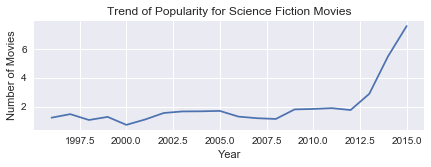

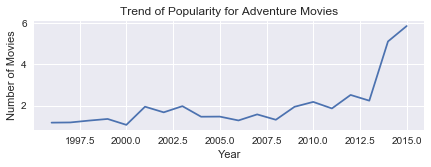

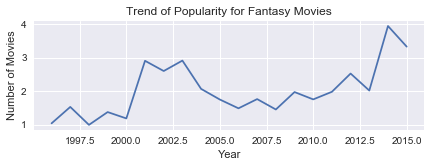

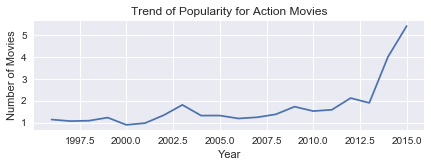

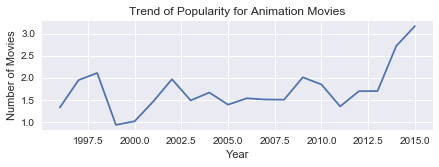

In [31]:
for i, genre in enumerate(popular_genres):
    df1 = popular_genres_movies[popular_genres_movies.genres == genre]
    plt.figure(figsize=(7, 2))
    plt.title('Trend of Popularity for {} Movies'.format(genre))
    plt.xlabel('Year')
    plt.ylabel('Number of Movies')
    plt.plot(df1['release_year'], df1['popularity'])
    plt.show()

We can  see the trend of popularity for the most popular genres has been increased over the 20 years of study.
<br>The positive trend is more visilble after 2012.
<br>The positive trend is more significant for 'Science Ficion', 'Adventure' and 'Action' genres.

Let's find out how was the trend of movie production for these most popular genres? Did the positvie trend in their popularity have any assosiation with their production?

### Trend of movie production for most popular genres from 1996 to 2015

In [32]:
popular_genres_movies_number = (df_genres.query("genres in @popular_genres")
                                  .groupby(['genres','release_year'], as_index=False)
                                  .id.count())  

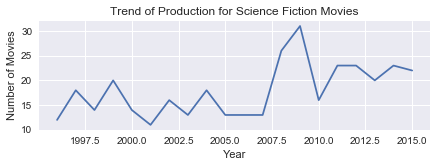

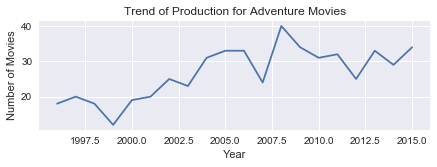

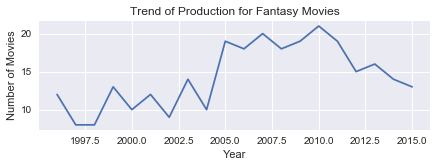

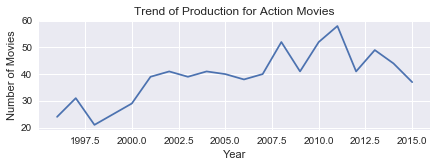

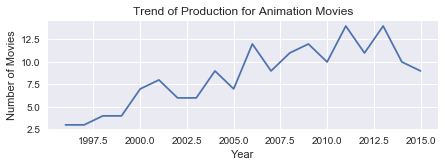

In [33]:
for i, genre in enumerate(popular_genres):
    df1 = popular_genres_movies_number[popular_genres_movies_number.genres == genre]
    plt.figure(figsize=(7, 2))
    plt.title('Trend of Production for {} Movies'.format(genre))
    plt.xlabel('Year')
    plt.ylabel('Number of Movies')
    plt.plot(df1['release_year'], df1['id'])
    plt.show()

Although we can see that there is an increase in the production of the most popular genres over 20 years, the trend of their production has been negative or none positive after 2012.

### Research Q2 : What kind of properties are associated with movies that have high revenues?

To make it possible to use our findings from first question(Reaserch Q1) and make a beeter conclusion, we use the same time period in this question too.
<br>We want to see how many movies have been released during the time period of our study.

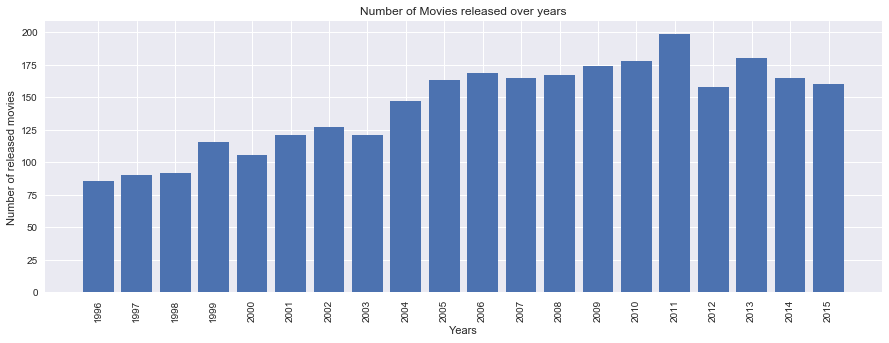

In [34]:
df1= (df_20years.groupby(['release_year'], as_index=False)['id'].count())

sns.set()
locations = list(range(1,21))
heights = df1.iloc[:, 1]
lables = df1.iloc[:, 0]
plt.subplots(figsize=(15, 5))
plt.bar(locations, heights, tick_label=lables)
plt.title('Number of Movies released over years')
plt.xlabel('Years')
plt.ylabel('Number of released movies');
plt.xticks(rotation=90); 


We can see that number of movies have been increased over the years. 

To answer our research question, first we need to find high revenue movies.
<br>Let's categorzie movies based on some statistics and visulaizations.

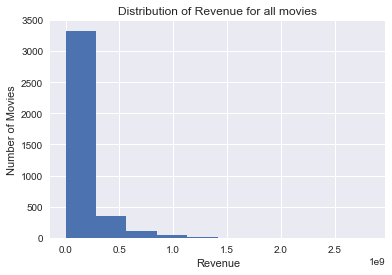

In [35]:
sns.set()
plt.hist(df['revenue_adj'])
plt.xlabel('Revenue')
plt.ylabel('Number of Movies')
plt.title('Distribution of Revenue for all movies')
plt.show();

In [36]:
df_20years.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,2884.000000,2884.000000,2884.000000,2884.000000,2884.000000,2884.000000,2.884000e+03,2.884000e+03
mean,49999.492025,1.283314,108.489598,601.418169,6.112067,2006.661928,4.761033e+07,1.277516e+08
std,74838.071719,1.601480,18.801966,945.451907,0.779351,5.434993,4.827910e+07,2.010761e+08
min,12.000000,0.001117,15.000000,10.000000,2.200000,1996.000000,9.693980e-01,2.370705e+00
25%,8487.750000,0.497205,95.000000,85.750000,5.600000,2002.000000,1.339331e+07,1.614076e+07
50%,13412.000000,0.876550,105.000000,253.000000,6.100000,2007.000000,3.137941e+07,5.783592e+07
75%,58169.250000,1.473959,118.000000,688.250000,6.600000,2011.000000,6.691203e+07,1.528228e+08
max,417859.000000,32.985763,338.000000,9767.000000,8.200000,2015.000000,4.250000e+08,2.827124e+09


Based on this statistics, we can divide our movies to high_revenue and low_revenue. In order to do that we consider the top 25 percent of revenue as high_revenue movies and the rest as low_revenue.

In [37]:
df_20years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2884 entries, 0 to 9153
Data columns (total 9 columns):
id              2884 non-null int64
popularity      2884 non-null float64
runtime         2884 non-null int64
genres          2884 non-null object
vote_count      2884 non-null int64
vote_average    2884 non-null float64
release_year    2884 non-null int64
budget_adj      2884 non-null float64
revenue_adj     2884 non-null float64
dtypes: float64(4), int64(4), object(1)
memory usage: 305.3+ KB


In [38]:
low_revenue = df_20years[df_20years.revenue_adj < 1.528228e+08]
high_revenue = df_20years[df_20years.revenue_adj > 1.528228e+08]

In [39]:
high_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721 entries, 0 to 9043
Data columns (total 9 columns):
id              721 non-null int64
popularity      721 non-null float64
runtime         721 non-null int64
genres          721 non-null object
vote_count      721 non-null int64
vote_average    721 non-null float64
release_year    721 non-null int64
budget_adj      721 non-null float64
revenue_adj     721 non-null float64
dtypes: float64(4), int64(4), object(1)
memory usage: 56.3+ KB


In [40]:
low_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2163 entries, 12 to 9153
Data columns (total 9 columns):
id              2163 non-null int64
popularity      2163 non-null float64
runtime         2163 non-null int64
genres          2163 non-null object
vote_count      2163 non-null int64
vote_average    2163 non-null float64
release_year    2163 non-null int64
budget_adj      2163 non-null float64
revenue_adj     2163 non-null float64
dtypes: float64(4), int64(4), object(1)
memory usage: 169.0+ KB


In [41]:
low_revenue_vote = low_revenue['vote_average'].mean()
high_revenue_vote = high_revenue['vote_average'].mean()
print(low_revenue_vote, high_revenue_vote)

6.0293111419324985 6.360332871012483


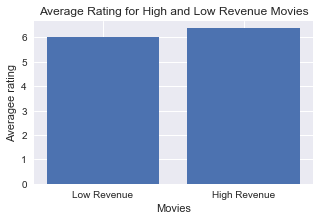

In [42]:
locations = (1 , 2)
heights = [low_revenue_vote, high_revenue_vote]
lables = ('Low Revenue', 'High Revenue')
plt.subplots(figsize=(5, 3))
plt.bar(locations, heights, tick_label=lables)
plt.title('Average Rating for High and Low Revenue Movies')
plt.xlabel('Movies')
plt.ylabel('Averagee rating');

Average rating for high revenue movies is slightly more than low revenue movies.

In [43]:
low_revenue_budget = low_revenue['budget_adj'].mean()
high_revenue_budget = high_revenue['budget_adj'].mean()
print(low_revenue_budget, high_revenue_budget)

30337834.586533476 99427806.69437586


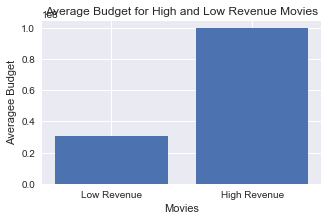

In [44]:
locations = (1 , 2)
heights = [low_revenue_budget, high_revenue_budget]
lables = ('Low Revenue', 'High Revenue')
plt.subplots(figsize=(5, 3))
plt.bar(locations, heights, tick_label=lables)
plt.title('Average Budget for High and Low Revenue Movies')
plt.xlabel('Movies')
plt.ylabel('Averagee Budget');

Budget for high revenue movies is 3 times more. 

In [45]:
low_revenue_popularity = low_revenue['popularity'].mean()
high_revenue_popularity = high_revenue['popularity'].mean()
print(low_revenue_popularity, high_revenue_popularity)

0.8895005903837255 2.4647558141470154


Text(0,0.5,'Averagee Popularity')

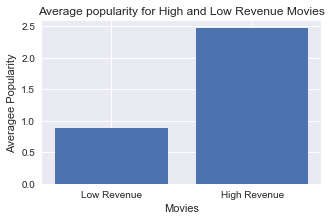

In [46]:
locations = (1 , 2)
heights = [low_revenue_popularity, high_revenue_popularity]
lables = ('Low Revenue', 'High Revenue')
plt.subplots(figsize=(5, 3))
plt.bar(locations, heights, tick_label=lables)
plt.title('Average popularity for High and Low Revenue Movies')
plt.xlabel('Movies')
plt.ylabel('Averagee Popularity')

Average popularity for high_revenue movies has been 3 times more than low revenue movies.

In [47]:
low_revenue_runtime = low_revenue['runtime'].mean()
high_revenue_runtime = high_revenue['runtime'].mean()
print(low_revenue_runtime, high_revenue_runtime)

106.0610263522885 115.7753120665742


Text(0,0.5,'Averagee Show Time')

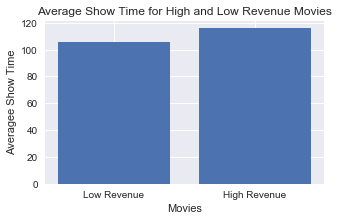

In [48]:
locations = (1 , 2)
heights = [low_revenue_runtime, high_revenue_runtime]
lables = ('Low Revenue', 'High Revenue')
plt.subplots(figsize=(5, 3))
plt.bar(locations, heights, tick_label=lables)
plt.title('Average Show Time for High and Low Revenue Movies')
plt.xlabel('Movies')
plt.ylabel('Averagee Show Time')

The average show time for high revenue movies had been 11 minutes longer than low revenue movies.

In [49]:
high_revenue_genres = (high_revenue.drop('genres', axis=1)
             .join
             (
             high_revenue.genres
             .str
             .split('|', expand=True)
             .stack()
             .reset_index(drop=True, level=1)
             .rename('genres')           
             ))
high_rev_gen_cnt= high_revenue_genres.groupby('genres', as_index = False).id.count()
high_rev_gen_cnt


,genres,id
0,Action,296
1,Adventure,265
2,Animation,100
3,Comedy,254
4,Crime,99
5,Drama,218
6,Family,152
7,Fantasy,141
8,History,20
9,Horror,41


In [50]:
low_revenue_genres = (low_revenue.drop('genres', axis=1)
             .join
             (
             low_revenue.genres
             .str
             .split('|', expand=True)
             .stack()
             .reset_index(drop=True, level=1)
             .rename('genres')           
             ))
low_rev_gen_cnt= low_revenue_genres.groupby('genres', as_index = False).id.count()
low_rev_gen_cnt

,genres,id
0,Action,486
1,Adventure,269
2,Animation,69
3,Comedy,784
4,Crime,373
5,Documentary,31
6,Drama,1116
7,Family,168
8,Fantasy,147
9,Foreign,9


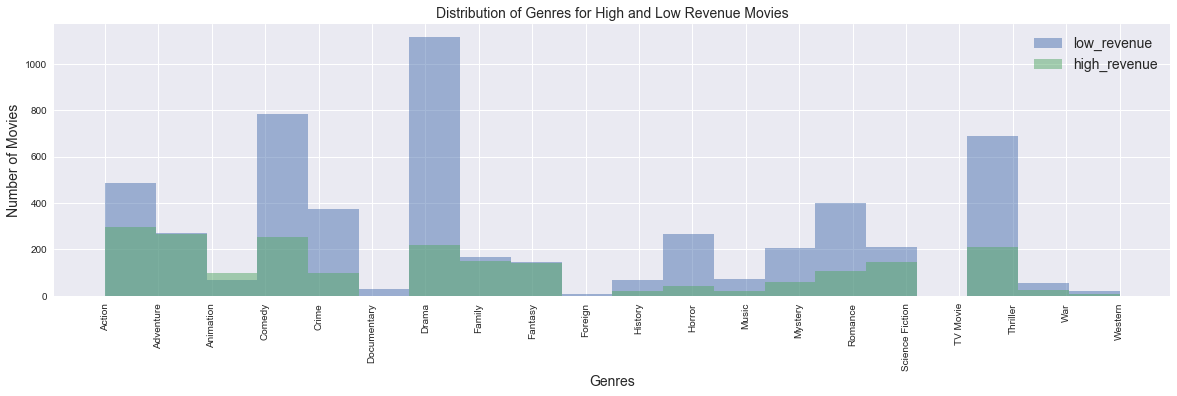

In [51]:
sns.set()
plt.figure(figsize=(20, 5))
plt.hist( low_revenue_genres['genres'], label='low_revenue', bins = 20, alpha=0.5)
plt.hist( high_revenue_genres['genres'], label='high_revenue', bins=20, alpha=0.5)
plt.xlabel('Genres', fontsize= 14)
plt.ylabel('Number of Movies', fontsize= 14)
plt.title('Distribution of Genres for High and Low Revenue Movies', fontsize= 14)
plt.xticks(rotation=90);
plt.legend(fontsize=14);

looks like 'Animation' was the most succesful, and 'Documnetory' and 'Foreign' were the lease successful genres in terms of revenue. Most of the movies with 'Animation' genre are categorized as high revenue, and all of the movies in 'Documentary' and 'Foreign' genres are categorized as low revenue.
<br>We picked top twenty five percent of revenue as high revenue movies, considering that and the above chart, we can say that 'Adventure', 'Fantasy' and 'Family' were more successful in terms of revenue. 'Action' and 'Science fiction' which were among top popular genres in the first research question(Q1), have a high ranking in revenue too.

<a id='conclusions'></a>
## Conclusions

In this research, we studied the records of movies from Movie Database(TMDb). Dring the data cleaning, we noticed that more than 60% of our movie records have a zero value in revenue or budget fields. We decided to drop the rows with zero value in budget or revenue fields, so we missed almost 60% of our data.

### Findings
-  'Science Fiction', 'Adventure', 'Fantasy', 'Action' and 'Animation' were the most popular genres between 1996 and 2015.
-  The trend of popularity has been increasing for the most popular genres over the 20 years of our study. After 2012 the positive trend is more significant.
-  The trend of movie production has been positive for the most popular genres between 1996 and 2012, then after 2012 it gets stable or negative.
-   There was a positive assosiation between movie revenue and these properties: popularity, average rating, movie showtime and movie budget.
- 'Animation' was the most successful genre in terms of revenue, and the average rating for this genre was higher than the overall mean value.
-  Although 'Adventure', 'Fantasy', "Family', 'Action' and 'Sience Fiction' were successful genres in terms of popularity and revenue, their average rating was lower than the overall mean value.
